In [7]:
import numpy as np
import pandas as pd
import emoji
from emoji import EMOJI_DATA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pywsd.utils import lemmatize_sentence
import string
import re

In [8]:
train_data=pd.read_csv('datasets/twitter_training.csv',header=None)
validation_data=pd.read_csv('datasets/twitter_validation.csv',header=None)


In [9]:
train_data

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
validation_data

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


# Data preprocessing

In [11]:

def data_preprocessing(data):
    #Renaming columns and removing "irrelevant" sentiments
    data=data.drop([0,1],axis=1)
    data=data.rename(columns={2:'Sentiment',3:'Tweet'})
    data.dropna(inplace=True)
    data=data[data['Sentiment']!='Irrelevant']
    data=data.drop_duplicates(keep = 'first')

    #Converting categorical data into integer format
    data["Sentiment"] = np.array(list(map(lambda y: 2 if y=="Positive" 
                                            else (1 if y=="Neutral" else 0),data["Sentiment"])))
    #Converting to lower case
    data['Tweet'] = [i.lower() for i in data['Tweet']]
    
    #removing punctuation
    data['Tweet'] = [i.translate(str.maketrans('', '', string.punctuation)) for i in data['Tweet']]
    
    #removing single words
    data['Tweet'] =  [re.sub(r"\b[a-zA-Z]\b", "", i) for i in data['Tweet']] 
    
    #removing mentions and hastag symbols
    data['Tweet'] =  [re.sub(r"@[a-zA-Z0-9]+|\#[a-zA-Z0-9]","",str(i)) for i in data['Tweet']] 
    
    #removing URL
    data['Tweet'] =  [re.sub(r'http\S+', "", str(i)) for i in data['Tweet']] 
    data['Tweet'] =  [re.sub(r"[0-9]","",i) for i in data['Tweet']] 
    stop_words = stopwords.words('english')
    
    def remove_stopwords(i):
        filtered_sentence = []
        for w in i:
            if w not in stop_words:
                filtered_sentence.append(w)
        return filtered_sentence
    def remove_emoji(i):
        for token in i:
            if token in EMOJI_DATA:
                i = re.sub(r'('+token+')', " ".join(emoji.demojize(token).replace(",","").replace(":","").replace("_"," ").split()), i)
        return i
    
    #converting emoji to words
    data['Tweet']= [remove_emoji(i) for i in data['Tweet']]
    
    #lemmatization 
    data['Tweet'] =  [lemmatize_sentence(i) for i in data['Tweet']]
    #removing stop words
    data['Tweet']= [remove_stopwords(i) for i in data['Tweet']]
    data['Tweet']= [ ' '.join(w) for w in data['Tweet']]
    return data
    

In [12]:
train_data=data_preprocessing(train_data)
print(train_data)

       Sentiment                                              Tweet
0              2                           im get borderland murder
1              2                                   come border kill
2              2                             im get borderland kill
3              2                          im come borderland murder
4              2                           im get borderland murder
...          ...                                                ...
74677          2  realize window partition mac like year behind ...
74678          2  realize mac window partition year behind nvidi...
74679          2  realize window partition mac year behind nvidi...
74680          2  realize window partition mac like year behind ...
74681          2  like window partition mac like year behind dri...

[57485 rows x 2 columns]


In [13]:
validation_data=data_preprocessing(validation_data)
print(validation_data)

     Sentiment                                              Tweet
1            1  bbc news amazon bos jeff bezos reject claim co...
2            0  microsoft pay word function poorly samsungus c...
3            0  csgo matchmaking full closet hack truly awful ...
4            1  president slap american face really commit unl...
5            0  hi eahelp ’ madeleine mccann cellar past year ...
..         ...                                                ...
993          0  please explain possible let company overcharge...
994          2  good sony much want see new p whats go right m...
997          2  today suck ’ time drink wine play borderland s...
998          2          bought fraction microsoft today small win
999          1  johnson johnson stop sell talc baby powder u c...

[827 rows x 2 columns]


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

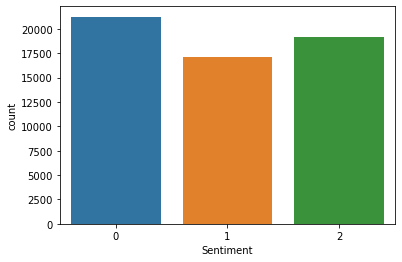

In [14]:
import seaborn as sns    
sns.countplot(x = "Sentiment" , data = train_data)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

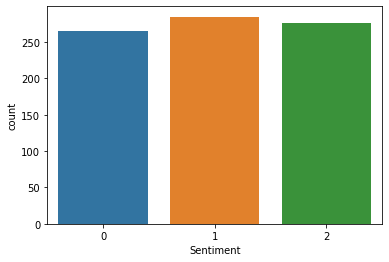

In [15]:
sns.countplot(x = "Sentiment" , data = validation_data)

In [16]:
train_data.to_csv('datasets/prepared_train.csv', encoding='utf-8', index=False)
validation_data.to_csv('datasets/prepared_validation.csv', encoding='utf-8', index=False)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [67]:
train_data=pd.concat([train_data,validation_data])
train_data.shape

(59966, 2)

In [74]:
tfidf= TfidfVectorizer()
tfidf.fit(train_data['Tweet'])
X = tfidf.transform(train_data['Tweet'])
Y = train_data['Sentiment']

In [75]:
X_train, X_validation,Y_train, Y_validation = train_test_split(X, Y, test_size=0.25, random_state = 42)
X_train
print(X_train.shape,Y_train.shape)
print(X_validation.shape,Y_validation.shape)

(44974, 29500) (44974,)
(14992, 29500) (14992,)


In [77]:
from sklearn.metrics import classification_report
RFClassifier = RandomForestClassifier()
RFClassifier.fit(X_train, Y_train)

Y_pred=RFClassifier.predict(X_validation)
print (accuracy_score(Y_validation,Y_pred))
print(classification_report(Y_validation,Y_pred))

0.9279615795090715
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5525
           1       0.92      0.91      0.92      4428
           2       0.93      0.93      0.93      5039

    accuracy                           0.93     14992
   macro avg       0.93      0.93      0.93     14992
weighted avg       0.93      0.93      0.93     14992

